In [67]:
import pandas as pd

df = pd.read_csv (r'C:\Users\syash\Downloads\data.csv')
#df = pd.DataFrame(data,)
df.drop('year',inplace=True, axis=1)
print (df.head())

   acousticness                                   artists  danceability  \
0         0.995                       ['Carl Woitschach']         0.708   
1         0.994  ['Robert Schumann', 'Vladimir Horowitz']         0.379   
2         0.604                   ['Seweryn Goszczyński']         0.749   
3         0.995                      ['Francisco Canaro']         0.781   
4         0.990  ['Frédéric Chopin', 'Vladimir Horowitz']         0.210   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       158648  0.1950         0  6KbQ3uYMLKb5jDxLF7wYDD             0.563   
1       282133  0.0135         0  6KuQTIu1KoTTkLXKrwlLPV             0.901   
2       104300  0.2200         0  6L63VW0PibdM1HDSBoqnoM             0.000   
3       180760  0.1300         0  6M94FkXd15sOAOQYRnWPN8             0.887   
4       687733  0.2040         0  6N6tiFZ9vLTSOIxkj8qKrd             0.908   

   key  liveness  loudness  mode  \
0   10    0.1510   -12.428     1   
1    8  

In [68]:
df.drop('release_date',inplace=True, axis=1)
print (df.head(10))

   acousticness                                     artists  danceability  \
0         0.995                         ['Carl Woitschach']         0.708   
1         0.994    ['Robert Schumann', 'Vladimir Horowitz']         0.379   
2         0.604                     ['Seweryn Goszczyński']         0.749   
3         0.995                        ['Francisco Canaro']         0.781   
4         0.990    ['Frédéric Chopin', 'Vladimir Horowitz']         0.210   
5         0.995  ['Felix Mendelssohn', 'Vladimir Horowitz']         0.424   
6         0.956        ['Franz Liszt', 'Vladimir Horowitz']         0.444   
7         0.988                         ['Carl Woitschach']         0.555   
8         0.995              ['Francisco Canaro', 'Charlo']         0.683   
9         0.846                     ['Seweryn Goszczyński']         0.674   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       158648  0.1950         0  6KbQ3uYMLKb5jDxLF7wYDD             0.563

In [55]:
x=df['key'].tolist()
y=df['tempo'].tolist()

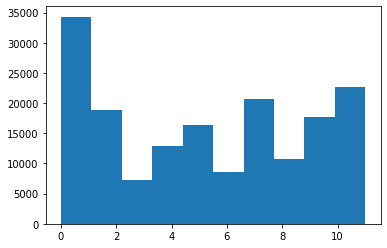

In [65]:
import matplotlib.pyplot as plt
import numpy
plt.hist(x, 10)
plt.show()

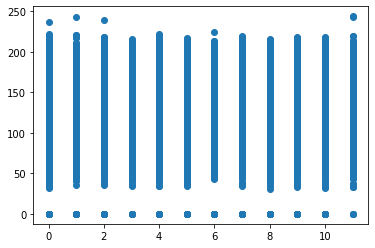

In [57]:
plt.scatter(x,y)

In [59]:
from sklearn.cluster import KMeans

km=KMeans(n_clusters=3)
a=km.fit_predict(df[['key','tempo']])
a

array([2, 0, 2, ..., 2, 2, 0])

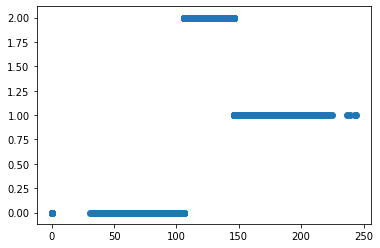

In [61]:
plt.scatter(y,a)

In [62]:
df['cluster']=a

In [63]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,cluster
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,2
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,0
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800,2
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,2
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0.0424,62.149,0.0693,0


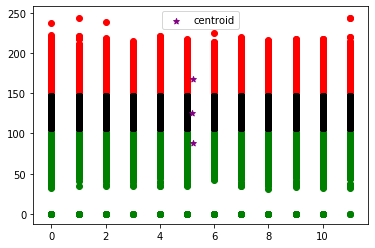

In [64]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.key,df1.tempo,color='green')
plt.scatter(df2.key,df2.tempo,color='red')
plt.scatter(df3.key,df3.tempo,color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [43]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [76]:
af=df.iloc[:100]

In [77]:
a=af['danceability'].tolist()
b=af['liveness'].tolist()

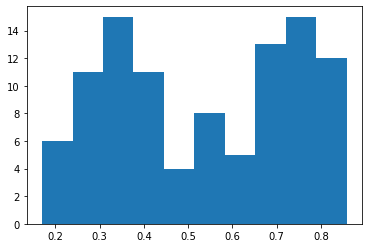

In [78]:
import matplotlib.pyplot as plt
import numpy
plt.hist(a, 10)
plt.show()

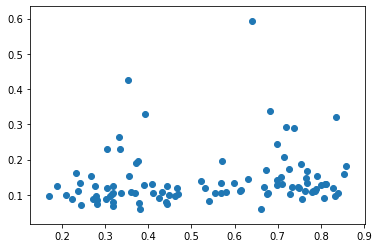

In [79]:
plt.scatter(a,b)

In [96]:
from sklearn.cluster import KMeans

km=KMeans(n_clusters=2)
m=km.fit_predict(df[['danceability','liveness']])
m

array([1, 0, 1, ..., 1, 1, 1])

In [97]:
df['cluster']=m
af=df.iloc[:100]


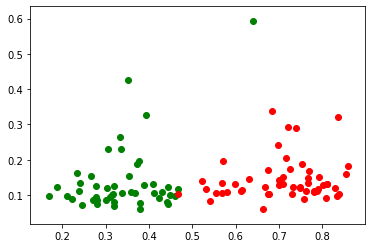

In [98]:
af1 = af[af.cluster==0]
af2 = af[af.cluster==1]
plt.scatter(af1.danceability,af1.liveness,color='green')
plt.scatter(af2.danceability,af2.liveness,color='red')

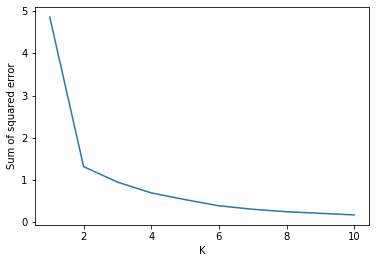

In [95]:
sse = []
k_rng = range(1,11)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(af[['danceability','liveness']])
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

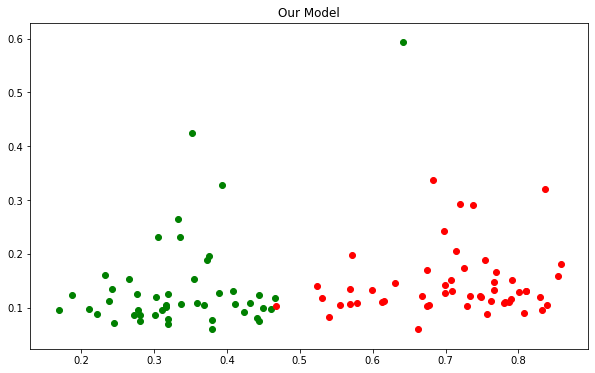

In [106]:
f, (ax1) = plt.subplots(1, sharey=True,figsize=(10,6))

ax1.set_title('Our Model')
ax1.scatter(af1.danceability,af1.liveness,color='green')
ax1.scatter(af2.danceability,af2.liveness,color='red')

In [109]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state= 42)  
y_predict=km.fit_predict(df[['key','tempo']])  